In [52]:
# import sample data
import skimage as ski
import os
#filename = os.path.join(ski.data_dir, '/Users/zg/Mammouth/PROJECTS/Analysis/Mitochondria-image-test/02-0001-crop.tif')
#mito = ski.io.imread(filename)


In [67]:
import napari
viewer = napari.Viewer()
#import nellie_napari as nellie

2024-04-28 | 19:14:03.278 :: DEBUG:in_n_out:[_store.py:765] :: Executing @injected ViewerToggleAction.__init__.<locals>.get_current(viewer: napari.viewer.Viewer) with args: (), kwargs: {}
2024-04-28 | 19:14:03.278 :: DEBUG:in_n_out:[_store.py:784] ::   injecting viewer: <class 'napari.viewer.Viewer'> = Viewer(camera=Camera(center=(0.0, 0.0, 0.0), zoom=1.0, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0, 2, 1), (0, 2, 1)), current_step=(0, 0), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[], help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x1348587c0>

In [46]:

ImageData=viewer.layers[0].data;
Preprocessed=viewer.layers[1].data;
Segment_Obj=viewer.layers[2].data;
Segment_Branches=viewer.layers[3].data;
Mocap_Markers=viewer.layers[4].data;

In [127]:
#ROI Analysis
from skimage import measure
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label

from skimage.morphology import closing, square, remove_small_objects

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

thresh = threshold_otsu(ImageData)
bw = closing(ImageData > thresh, square(3))
thresholded_image = ImageData > thresh*2

# remove artifacts connected to image border
cleared = clear_border(bw)
# label image regions
label_image = label(cleared)

labeled_image = measure.label(thresholded_image)
region_properties = measure.regionprops_table(labeled_image, ImageData, properties=['area', 'intensity_mean'])

# Convert the dictionary to a pandas DataFrame
region_df = pd.DataFrame(region_properties)

# Melt the DataFrame to reshape it for plotting
melted_df = region_df.melt(var_name='Property', value_name='Value')

pd.DataFrame(region_properties)

,area,intensity_mean
0,104.0,12618.605769
1,25.0,11449.000000
2,14.0,11780.000000
3,457.0,12700.437637
4,269.0,15579.000000
5,12095.0,15540.677966
6,1.0,10922.000000
7,147.0,14980.809524
8,138.0,13132.000000
9,1.0,10994.000000


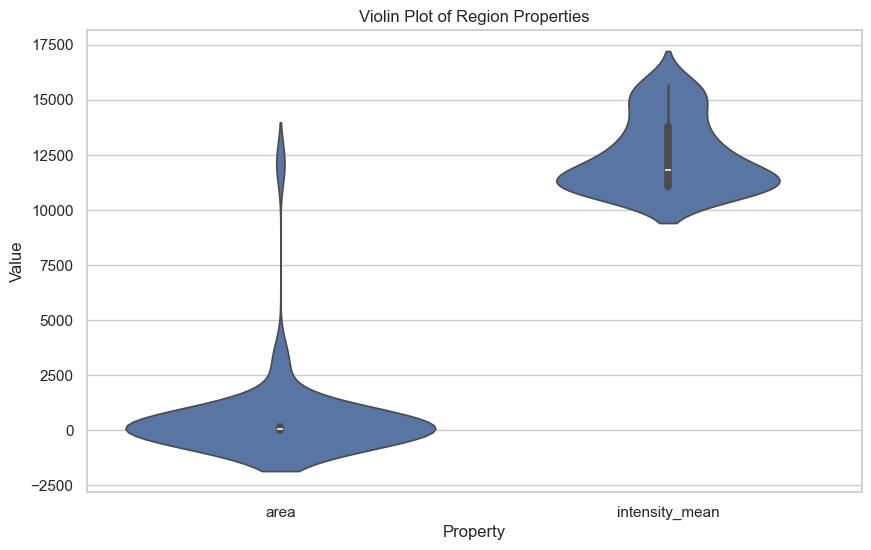

In [128]:
sns.set_theme(style="whitegrid")

#Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Property', y='Value', data=melted_df)

# Add labels and title
plt.xlabel('Property')
plt.ylabel('Value')
plt.title('Violin Plot of Region Properties')

plt.show()


2024-04-28 | 21:11:13.800 :: DEBUG:matplotlib.colorbar:[colorbar.py:859] :: locator: <matplotlib.ticker.AutoLocator object at 0x1688bbad0>


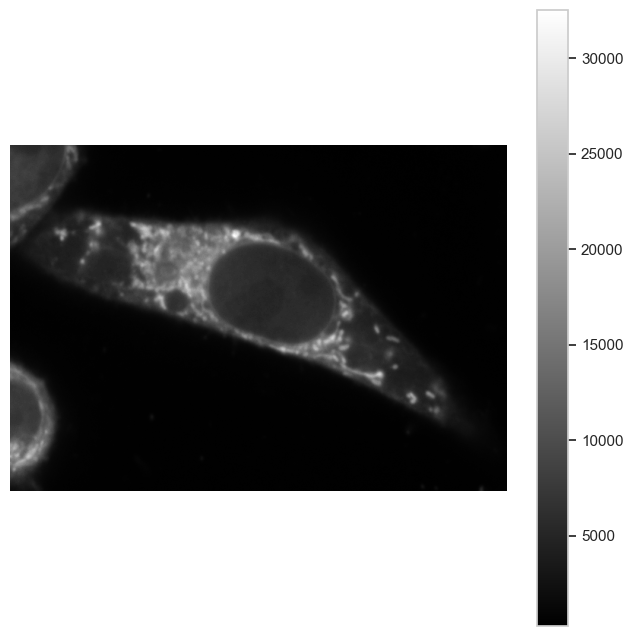

In [137]:
plt.figure(figsize=(8, 8))
plt.imshow(ImageData, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()